<a href="https://colab.research.google.com/github/shannondill/GEOG5990M/blob/main/V5_finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GEOG5990M Final Assignment (Template)

Student ID number:

# Import packages

In [1]:
#Pip installs
! pip install contextily
! pip install geoplot
! pip install git+https://github.com/pmdscully/geo_northarrow.git
! pip install patool
! pip install mapclassify
! pip install geopandas fiona

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 97.1 MB/s eta 0:00:00
  Cloning https://github.com/pmdscully/geo_northarrow.git to /tmp/pip-req-build-3m4dfpc7
  Running command git clone --filter=blob:none --quiet https://github.com/pmdscully/geo_northarrow.git /tmp/pip-req-build-3m4dfpc7
  Resolved https://github.com/pmdscully/geo_northarrow.git to commit 963bdd271707a3bcaa47b2d83d92b88ae0b10950
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for geo_northarrow: filename=geo_northarrow-0.2.0a0-py3-none-any.whl size=14725 sha256=aebd60ecbf36cb754972109ee6113f35f30cc933504ff4f0cfad76c8f7cf34ea
  Stored in directory: /tmp/pip-ephem-wheel-cache-4av1b89l/wheels/6a/22/96/2e5d1215f457d6b69b44cbaa1a0d3b822bc656dcabcda80095
Succe

In [2]:
# import required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from scipy import stats
import numpy as np

import geoplot as gplt
import geoplot.crs as gcrs
from geo_northarrow import add_north_arrow
import contextily as ctx
import patoolib
import glob

# import machine learning packages
from sklearn import cluster
from sklearn.preprocessing import scale

# set seaborn plotting theme to white
sns.set_theme(style="white")


In [ ]:
#Extracting the data into a folder
#patoolib.extract_archive('/content/OSM_cycleroutes.zip', outdir='/content/OSM_cycleroutes/*.shp')

INFO patool: Extracting /content/OSM_cycleroutes.zip ...
INFO:patool:Extracting /content/OSM_cycleroutes.zip ...
INFO patool: ... creating output directory `/content/OSM_cycleroutes/*.shp'.
INFO:patool:... creating output directory `/content/OSM_cycleroutes/*.shp'.
INFO patool: running /usr/bin/7z x -aou -o/content/OSM_cycleroutes/*.shp -- /content/OSM_cycleroutes.zip
INFO:patool:running /usr/bin/7z x -aou -o/content/OSM_cycleroutes/*.shp -- /content/OSM_cycleroutes.zip
INFO patool: ... /content/OSM_cycleroutes.zip extracted to `/content/OSM_cycleroutes/*.shp'.
INFO:patool:... /content/OSM_cycleroutes.zip extracted to `/content/OSM_cycleroutes/*.shp'.


'/content/OSM_cycleroutes/*.shp'

# Importing and cleaning data sets

In [ ]:
#for filepath in glob.iglob('/content/OSM_cycleroutes'):
 # try:
   # gdf = gpd.read_file(filepath)
   # print(f'Successfully read {filepath}')
 # except Exception as e:
     # print(f'Error reading {filepath}: {e}')

Error reading /content/OSM_cycleroutes: index 0 is out of bounds for axis 0 with size 0


In [ ]:
#Import the shapefiles
#for filepath in glob.iglob('OSM_cycleroutes/'):
   # gdf = gpd.read_file('OSM_cycleroutes')

# SHAPEFILE SOURCE:
# https://www.openstreetmap.org/export#map=12/53.7949/-1.5504&layers=C

# SOURCE
# https://gis.stackexchange.com/questions/394391/reading-all-shapefiles-in-folder-using-geopandas-and-then-clipping-them-all-iter

DataSourceError: 'OSM_cycleroutes' not recognized as being in a supported file format. It might help to specify the correct driver explicitly by prefixing the file path with '<DRIVER>:', e.g. 'CSV:path'.

In [5]:
# lsoa leeds

shp = gpd.read_file('/content/LSOADecember_2021)_Boundaries_EW_BFC_(V10).geojson')

leeds_shp = shp.loc[shp['LSOA21NM'].str.contains('Leeds'),:]
leeds_shp.to_file('Leeds.geojson')


In [8]:
# read in Leeds shape file
leeds_lsoa = gpd.read_file('/content/Leeds.geojson')
# make column names lower case
leeds_lsoa.columns = leeds_lsoa.columns.str.lower()

# Ensure it is saved as a GeoDataFrame (to make use of the geometry)
leeds_lsoa = gpd.GeoDataFrame(leeds_lsoa)

# check table has been updated
leeds_lsoa.head()

,fid,lsoa21cd,lsoa21nm,lsoa21nmw,bng_e,bng_n,lat,long,shape__area,shape__length,globalid,geometry
0,10720,E01011264,Leeds 011A,,420937,441836,53.87233,-1.68306,6.373247e+05,5076.727907,e4ed2f01-7253-4c5a-ba48-c2778526dc67,"POLYGON ((-1.67829 53.87663, -1.67775 53.87654..."
1,10721,E01011265,Leeds 009A,,418988,441951,53.87343,-1.71270,5.273672e+05,7553.237963,4d252abf-180d-4c24-ae8f-3932dd433d0f,"POLYGON ((-1.71803 53.87891, -1.71799 53.87886..."
2,10722,E01011266,Leeds 008A,,417489,442615,53.87945,-1.73546,2.531467e+06,8353.989324,66191f73-111e-4f37-ba33-42666730927f,"POLYGON ((-1.73093 53.88634, -1.73085 53.88633..."
3,10723,E01011267,Leeds 009B,,419641,442025,53.87408,-1.70276,4.491912e+05,3774.393194,85e5e657-9d57-4a48-aa5f-61fdc02cd326,"POLYGON ((-1.70324 53.87734, -1.70317 53.87675..."
4,10724,E01011268,Leeds 010A,,420224,441935,53.87324,-1.69390,3.949483e+05,4362.834372,58280f14-db59-4eee-875a-44d3c04026d8,"POLYGON ((-1.69055 53.87774, -1.69053 53.87759..."


Check coordinate reference system (crs) for LSOA data:



In [9]:
# check crs
leeds_lsoa.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The above crs is not UK specific.  It must be changed to the British National Grid system; EPSG:27700

In [11]:
# update crs
leeds_lsoa= leeds_lsoa.to_crs(epsg=27700)
# check crs
leeds_lsoa.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [12]:
# Method used to travel to work [2]
travel = gpd.read_file('/content/LSOA_RM077-2021-4-filtered-2025-04-28T10_55_14Z.csv')
# make column names lower case
travel.columns = travel.columns.str.lower()
# check table has been updated
travel.head()

,lower layer super output areas code,lower layer super output areas,method used to travel to workplace (12 categories) code,method used to travel to workplace (12 categories),distance travelled to work (5 categories) code,distance travelled to work (5 categories),observation
0,E01000001,City of London 001A,1,Work mainly at or from home,1,Less than 10km,0
1,E01000001,City of London 001A,1,Work mainly at or from home,2,10km to less than 30km,0
2,E01000001,City of London 001A,1,Work mainly at or from home,3,30km and over,0
3,E01000001,City of London 001A,1,Work mainly at or from home,4,Works mainly from home,639
4,E01000001,City of London 001A,1,Work mainly at or from home,5,"Not in employment or works mainly offshore, in...",0


In [14]:
### CO-PILOT ###
# The following prompt was used in Co-pilot to .loc[] LSOA Leeds specific data:
# "generate a code using the python .loc[] function to loc only Leeds LSOAs"
# The response generated was used to help write the below code

# .loc[] Leeds from lsoa_data
travel = travel.loc[travel['lower layer super output areas'].str.contains('Leeds')]
# check the data set has been updated
travel

,lower layer super output areas code,lower layer super output areas,method used to travel to workplace (12 categories) code,method used to travel to workplace (12 categories),distance travelled to work (5 categories) code,distance travelled to work (5 categories),observation
643140,E01011264,Leeds 011A,1,Work mainly at or from home,1,Less than 10km,0
643141,E01011264,Leeds 011A,1,Work mainly at or from home,2,10km to less than 30km,0
643142,E01011264,Leeds 011A,1,Work mainly at or from home,3,30km and over,0
643143,E01011264,Leeds 011A,1,Work mainly at or from home,4,Works mainly from home,156
643144,E01011264,Leeds 011A,1,Work mainly at or from home,5,"Not in employment or works mainly offshore, in...",0
...,...,...,...,...,...,...,...
669415,E01011739,Leeds 080D,12,Not in employment or aged 15 years and under,1,Less than 10km,0
669416,E01011739,Leeds 080D,12,Not in employment or aged 15 years and under,2,10km to less than 30km,0
669417,E01011739,Leeds 080D,12,Not in employment or aged 15 years and under,3,30km and over,0
669418,E01011739,Leeds 080D,12,Not in employment or aged 15 years and under,4,Works mainly from home,0


Table join 'leeds_lsoa' geojson file with 'travel' data to make use of the geometry

In [15]:
# table join leeds_lsoa and travel datasets
leeds =leeds_lsoa.merge(travel, how='left',left_on='lsoa21cd',right_on='lower layer super output areas code')
leeds.head()

,fid,lsoa21cd,lsoa21nm,lsoa21nmw,bng_e,bng_n,lat,long,shape__area,shape__length,globalid,geometry,lower layer super output areas code,lower layer super output areas,method used to travel to workplace (12 categories) code,method used to travel to workplace (12 categories),distance travelled to work (5 categories) code,distance travelled to work (5 categories),observation
0,10720,E01011264,Leeds 011A,,420937,441836,53.87233,-1.68306,637324.715637,5076.727907,e4ed2f01-7253-4c5a-ba48-c2778526dc67,"POLYGON ((421248.388 442317.47, 421283.772 442...",E01011264,Leeds 011A,1,Work mainly at or from home,1,Less than 10km,0
1,10720,E01011264,Leeds 011A,,420937,441836,53.87233,-1.68306,637324.715637,5076.727907,e4ed2f01-7253-4c5a-ba48-c2778526dc67,"POLYGON ((421248.388 442317.47, 421283.772 442...",E01011264,Leeds 011A,1,Work mainly at or from home,2,10km to less than 30km,0
2,10720,E01011264,Leeds 011A,,420937,441836,53.87233,-1.68306,637324.715637,5076.727907,e4ed2f01-7253-4c5a-ba48-c2778526dc67,"POLYGON ((421248.388 442317.47, 421283.772 442...",E01011264,Leeds 011A,1,Work mainly at or from home,3,30km and over,0
3,10720,E01011264,Leeds 011A,,420937,441836,53.87233,-1.68306,637324.715637,5076.727907,e4ed2f01-7253-4c5a-ba48-c2778526dc67,"POLYGON ((421248.388 442317.47, 421283.772 442...",E01011264,Leeds 011A,1,Work mainly at or from home,4,Works mainly from home,156
4,10720,E01011264,Leeds 011A,,420937,441836,53.87233,-1.68306,637324.715637,5076.727907,e4ed2f01-7253-4c5a-ba48-c2778526dc67,"POLYGON ((421248.388 442317.47, 421283.772 442...",E01011264,Leeds 011A,1,Work mainly at or from home,5,"Not in employment or works mainly offshore, in...",0


In [ ]:
# Cycle Data (July 2024) [3]
cycle_july = gpd.read_file('CycleData_July2024.csv')
# make columns lower case
cycle_july.columns = cycle_july.columns.str.lower()
#check table has been updated
cycle_july.head()

,sdate,cosit,period,lanenumber,lanedescription,lanedirection,directiondescription,volume,flag text
0,01/07/2024,80474,60,1,Eastbound,1,East,1,Checked
1,01/07/2024,80474,60,2,Westbound,2,West,0,Checked
2,01/07/2024,80474,60,1,Eastbound,1,East,0,Checked
3,01/07/2024,80474,60,2,Westbound,2,West,1,Checked
4,01/07/2024,80474,60,1,Eastbound,1,East,0,Checked


In [ ]:
# Cycle Data (December 2024)
cycle_december = gpd.read_file('CycleData_December2024.csv')
# make columns lower case
cycle_december.columns = cycle_december.columns.str.lower()
# check table has been updated
cycle_december.head()

,sdate,cosit,period,lanenumber,lanedescription,lanedirection,directiondescription,volume,flag text
0,01/12/2024 00:00,80474,60,1,Eastbound,1,East,0,Checked
1,01/12/2024 00:00,80474,60,2,Westbound,2,West,0,Checked
2,01/12/2024 01:00,80474,60,1,Eastbound,1,East,1,Checked
3,01/12/2024 01:00,80474,60,2,Westbound,2,West,0,Checked
4,01/12/2024 02:00,80474,60,1,Eastbound,1,East,1,Checked


LSOA data [1](https://geoportal.statistics.gov.uk/datasets/ons::lower-layer-super-output-areas-december-2021-boundaries-ew-bfc-v10-2/about)

Method used to travel to work [2](https://www.ons.gov.uk/datasets/RM077/editions/2021/versions/4?showAll=transport_to_workplace_12a#transport_to_workplace_12a)

Cycle data (July 2024) [3](https://datamillnorth.org/dataset/e1dmk/leeds-annual-cycle-growth)


National Cycle Network [4](https://data-sustrans-uk.opendata.arcgis.com/datasets/5defd254e78745bfb12d0456abc1bcf1_0/explore?location=53.777209%2C-1.772170%2C9.58)

This is an example block of mardown text I want to reference <a href="#ref1">[1]</a>. I might need to add some more citations <a href="#ref2">[2]</a><a href="#ref2">[3]</a>



# Data cleaning

### Updating data types

In [ ]:
# Check what the data types are classed under
cycle_july.dtypes

,0
sdate,object
cosit,object
period,object
lanenumber,object
lanedescription,object
lanedirection,object
directiondescription,object
volume,object
flag text,object


In [ ]:
# update the data types from 'objects' to its numeric form (eg/. 'int', 'string')
cycle_july['cosit']=pd.to_numeric(cycle_july['cosit'])

cycle_july['lanedescription']=cycle_july['lanedescription'].astype('str')
cycle_july['directiondescription']=cycle_july['directiondescription'].astype('str')

cycle_july['volume']=pd.to_numeric(cycle_july['volume'])

# check it has been updated
cycle_july.dtypes

#SOURCE: https://stackoverflow.com/questions/39173813/pandas-convert-dtype-object-to-int
  # df['col_name'] = pd.to_numeric(df['col_name'])
#SOURCE: https://stackoverflow.com/questions/33957720/how-to-convert-column-with-dtype-as-object-to-string-in-pandas-dataframe
  # df['column'] = df['column'].astype('str')

,0
sdate,object
cosit,int64
period,object
lanenumber,object
lanedescription,object
lanedirection,object
directiondescription,object
volume,int64
flag text,object


In [ ]:
### CO-PILOT ###
# The following prompt was used in Co-pilot to isolate and join the geometry column with the LSOA data:
# "python, pandas: generate a code using pd.to_datetime(df['col']) to ensure the
  # date is read day-month-year"
# The response generated was used to help write the below code

# change sdate from 'object' to 'date' dtype
cycle_july['sdate']=pd.to_datetime(cycle_july['sdate'],
                                     # make sure it is reading as day/month/year
                                     dayfirst=True)

# Check changes were made
cycle_july.dtypes

,0
sdate,datetime64[ns]
cosit,int64
period,object
lanenumber,object
lanedescription,object
lanedirection,object
directiondescription,object
volume,int64
flag text,object


In [ ]:
cycle_december.dtypes

,0
sdate,object
cosit,object
period,object
lanenumber,object
lanedescription,object
lanedirection,object
directiondescription,object
volume,object
flag text,object


In [ ]:
# update the data types from 'objects' to its numeric form (eg/. 'int', 'string')
cycle_december['cosit']=pd.to_numeric(cycle_december['cosit'])

cycle_december['lanedescription']=cycle_december['lanedescription'].astype('str')
cycle_december['directiondescription']=cycle_december['directiondescription'].astype('str')

cycle_december['volume']=pd.to_numeric(cycle_december['volume'])

# change sdate from 'object' to 'date' dtype
cycle_december['sdate']=pd.to_datetime(cycle_december['sdate'],
                                     # make sure it is reading as day/month/year
                                     dayfirst=True)
# check it has been updated
cycle_december.dtypes

,0
sdate,datetime64[ns]
cosit,int64
period,object
lanenumber,object
lanedescription,object
lanedirection,object
directiondescription,object
volume,int64
flag text,object


### Subsetting spatial data

# Statistical Modelling

### Non-spatial Visualization

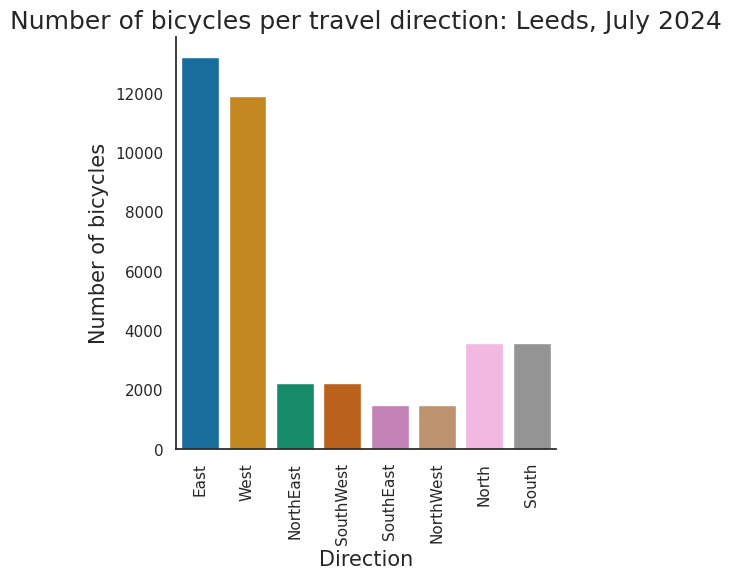

In [ ]:
# Number of bicycles per travel direction: Leeds, July 2024

sns.catplot(x='directiondescription', data=cycle_july, kind='count', width=0.8,
            #set colour
            palette='colorblind', hue='directiondescription', legend=False)

#set title and font size
plt.title('Number of bicycles per travel direction: Leeds, July 2024', size=18)

#set axis titles and font size
plt.xlabel('Direction', size=15)
plt.ylabel('Number of bicycles', size=15)


#rotate x-axis labels
plt.xticks(rotation=90)
plt.show()

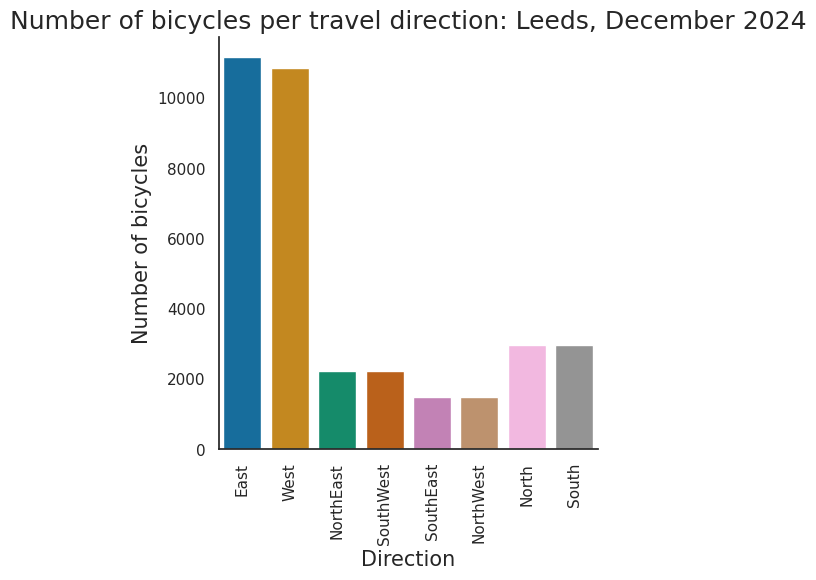

In [ ]:
# Number of bicycles per travel direction: Leeds, July 2024

sns.catplot(x='directiondescription', data=cycle_december, kind='count', width=0.8,
            #set colour
            palette='colorblind', hue='directiondescription', legend=False)

#set title and font size
plt.title('Number of bicycles per travel direction: Leeds, December 2024', size=18)

#set axis titles and font size
plt.xlabel('Direction', size=15)
plt.ylabel('Number of bicycles', size=15)


#rotate x-axis labels
plt.xticks(rotation=90)
plt.show()

Data Visualisation
- Don't forget to present your final two data visualisation (one spatial and one non-spatial) and the justifications about the decisions you made whilst preparing and visualising the data.

### Spatial Visualization

## References
<p><a href="add_url_here">[1]</a>Footnote citation goes here</p>
<p><a href="https://github.com/FrancescaPontin/GEOG5990">[2]</a>GEOG5990M course materials</p>
<p><a href="add_url_here">[3]</a>Citation 3</p>